# Problem Statement: 
- Predict price of the boat depending on the following factors:

Boat Type,	Manufacturer,	Type,	Year Built,	Length,	Width,	Material,	Location,	Number of views last 7 days.

In [412]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [413]:
# reading the dataset
df = pd.read_csv('boat_data.csv')
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [414]:
# checking the shape:
df.shape

(9888, 10)

In [415]:
#checking the dtypes and columns:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [416]:
#checking for duplicates:
df.duplicated().sum()

0

In [417]:
#checking for null values:
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

## Analysing each column:

In [418]:
# Price                             
df['Price'].unique()

array(['CHF 3337', 'EUR 3490', 'CHF 3770', ..., 'EUR 4499', 'EUR 4300',
       'CHF 3780'], dtype=object)

In [419]:
#checking the value counts:
df['Price'].value_counts()

EUR 65000      77
EUR 45000      67
EUR 75000      64
EUR 89000      64
EUR 55000      61
               ..
EUR 1199000     1
EUR 1197600     1
EUR 1184590     1
EUR 1163760     1
CHF 3780        1
Name: Price, Length: 3182, dtype: int64

In [420]:
#creating a new column 'currency' by splitting the price column:
df['Currency'] = df['Price'].str.split(" ",expand=True)[0]
df['Price'] = df['Price'].str.split(" ",expand=True)[1].astype(int)

In [421]:
#recehcking the dataset:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR


In [422]:
df['Currency'].value_counts()

EUR    8430
CHF     980
Â£      298
DKK     180
Name: Currency, dtype: int64

In [423]:
#defining a func to change the price to EUR according to currency:
def convert_price_to_usd(df):
  for i in range(len(df)):
    if df['Currency'][i] == 'CHF':
      df['Price'][i] = df['Price'][i]
    elif df['Currency'][i] == 'Â£':
      df['Price'][i] = df['Price'][i] * 1.13
    elif df['Currency'][i] == 'DKK':
      df['Price'][i] = df['Price'][i] * 0.13
    else:
      continue
  return df

In [424]:
new_df = df.copy()
new_df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR


In [425]:
convert_price_to_usd(new_df)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency
0,3337.0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF
1,3490.0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR
2,3770.0,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF
3,3367.0,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK
4,3399.0,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR
...,...,...,...,...,...,...,...,...,...,...,...
9883,4900.0,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.30,2.44,NaN,Switzerland Â» Lago Maggiore Â» Riazzino,1116,CHF
9884,4516.0,Sport Boat,NaN,new boat from stock,0,4.17,1.68,GRP,Germany Â» Hamburg Â» HAMBURG,94,EUR
9885,4499.0,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,Germany Â» Nordrhein-Westfalen Â» Wesel,354,EUR
9886,4300.0,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.37,1.89,NaN,Italy Â» Dormelletto,266,EUR


In [426]:
new_df=new_df.drop(columns='Currency')

In [427]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   float64
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 772.6+ KB


In [428]:
#checking the stats:
new_df.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,Price,Year Built,Length,Width,Number of views last 7 days
count,9.888000e+03,9888.000000,9879.000000,9832.000000,9888.000000
mean,3.019859e+05,1893.192860,11.570017,3.520124,149.160801
std,9.681991e+05,460.201582,6.002820,1.220534,151.819752
min,3.224000e+03,0.000000,1.040000,0.010000,13.000000
1%,6.217500e+03,0.000000,4.260000,1.650000,27.000000
10%,2.108100e+04,1976.000000,6.000000,2.290000,48.000000
25%,4.298750e+04,1996.000000,7.470000,2.540000,70.000000
50%,9.250000e+04,2007.000000,10.280000,3.330000,108.000000
75%,2.478650e+05,2017.000000,13.930000,4.250000,172.000000
90%,5.800000e+05,2020.000000,18.800000,5.000000,283.000000


<Axes: >

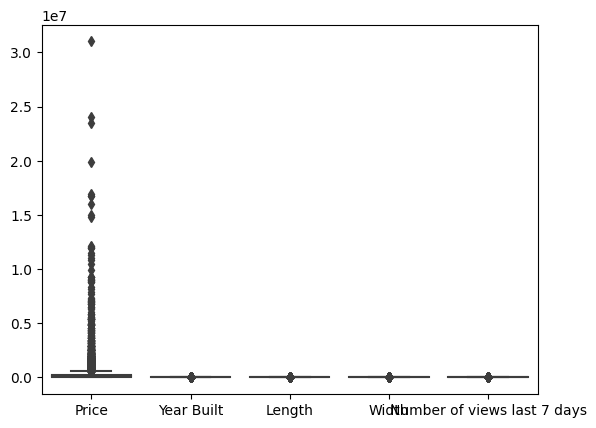

In [429]:
#checking for outliers:
sns.boxplot(new_df)

<Axes: >

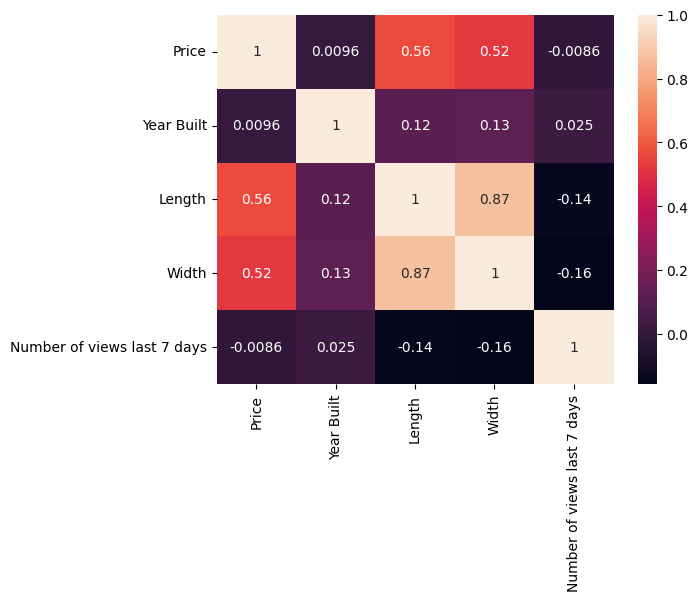

In [430]:
#checking for correlation:
sns.heatmap(new_df.corr(),annot=True)

In [431]:
# analysing the boat type:
new_df['Boat Type'].nunique()

126

In [432]:
new_df['Boat Type'].value_counts().head(20)

Motor Yacht            2720
Sport Boat             1407
Flybridge              1194
Trawler                 679
Pilothouse              613
Cabin Boat              585
Hardtop                 507
Center console boat     369
Bowrider                301
Deck Boat               283
Fishing Boat            173
House Boat              145
Mega Yacht              108
Pontoon Boat             91
Runabout                 73
Classic                  59
Classic,Runabout         59
Wakeboard/Wakesurf       58
Launch                   55
Offshore Boat            54
Name: Boat Type, dtype: int64

In [433]:
#keeping boats with more than 200 value counts, replacing rest with 'others'
counts = new_df['Boat Type'].value_counts()
replace_list = counts[counts<200].index
new_df['Boat Type'].replace(replace_list,'others',inplace=True)

In [434]:
new_df['Boat Type'].value_counts()

Motor Yacht            2720
Sport Boat             1407
others                 1230
Flybridge              1194
Trawler                 679
Pilothouse              613
Cabin Boat              585
Hardtop                 507
Center console boat     369
Bowrider                301
Deck Boat               283
Name: Boat Type, dtype: int64

In [435]:
new_df['Manufacturer'].nunique()

910

In [436]:
#analysing Manufacturer
new_df['Manufacturer'].value_counts()

BÃ©nÃ©teau power boats         631
Jeanneau power boats           537
Sunseeker power boats          383
Princess power boats           241
Sea Ray power boats            239
                              ... 
Aegean Yachts power boats        1
ISA Yachts power boats           1
Couach power boats               1
Perini Navi Spa power boats      1
Hunter power boats               1
Name: Manufacturer, Length: 910, dtype: int64

In [437]:
# filling the missing values with 'others':
new_df['Manufacturer'] = new_df['Manufacturer'].fillna('others')

In [438]:
#keeping Manufacturers with more than 100 value counts, replacing rest with 'others2'
counts = new_df['Manufacturer'].value_counts()
replace_list = counts[counts<20].index
new_df['Manufacturer'].replace(replace_list,'others3',inplace=True)
replace_list = counts[counts<50].index
new_df['Manufacturer'].replace(replace_list,'others2',inplace=True)

In [439]:
new_df['Manufacturer'].value_counts()

others3                                       2803
others2                                       1443
others                                        1338
BÃ©nÃ©teau power boats                         631
Jeanneau power boats                           537
Sunseeker power boats                          383
Princess power boats                           241
Sea Ray power boats                            239
Cranchi power boats                            219
Azimut power boats                             215
Bavaria power boats                            185
Fairline power boats                           172
Quicksilver (Brunswick Marine) power boats     167
Sessa power boats                              148
Bayliner power boats                           142
Sealine power boats                            120
Quicksilver power boats                        118
Prestige Yachts power boats                    108
Galeon power boats                              94
Regal power boats              

In [440]:
#analysing type:
new_df['Type'].nunique()

24

In [441]:
new_df['Type'].value_counts()

Used boat,Diesel                4140
Used boat,Unleaded              1686
Used boat                       1462
new boat from stock,Unleaded    1107
new boat from stock              665
new boat from stock,Diesel       291
new boat on order,Unleaded       150
Display Model,Unleaded            75
new boat on order                 61
new boat on order,Diesel          61
Diesel                            57
Used boat,Electric                27
Unleaded                          22
Display Model,Diesel              19
new boat from stock,Electric      18
Display Model                     18
Used boat,Gas                     10
Display Model,Electric             6
new boat from stock,Gas            2
new boat from stock,Hybrid         1
Used boat,Hybrid                   1
Display Model,Gas                  1
Electric                           1
Used boat,Propane                  1
Name: Type, dtype: int64

In [442]:
#keeping Type with more than 50 value counts, replacing rest with 'others'
counts = new_df['Type'].value_counts()
replace_list = counts[counts<50].index
new_df['Type'].replace(replace_list,'others',inplace=True)

In [443]:
new_df['Type'] = new_df['Type'].fillna('others')
new_df['Type'].value_counts()

Used boat,Diesel                4140
Used boat,Unleaded              1686
Used boat                       1462
new boat from stock,Unleaded    1107
new boat from stock              665
new boat from stock,Diesel       291
new boat on order,Unleaded       150
others                           133
Display Model,Unleaded            75
new boat on order                 61
new boat on order,Diesel          61
Diesel                            57
Name: Type, dtype: int64

In [444]:
new_df['Year Built'].unique()

array([2017, 2020,    0, 2019, 1999, 2018, 1987, 2004, 1997, 1985, 1981,
       2011, 1979, 1998, 1994, 1996, 1972, 1980, 1974, 1983, 1991, 1992,
       1961, 2015, 2000, 1993, 1968, 2007, 1990, 2010, 1975, 1986, 1941,
       1971, 2005, 1995, 1976, 2001, 2006, 2016, 1984, 1964, 1978, 1940,
       1988, 2003, 1977, 1973, 1970, 1913, 1965, 1950, 2014, 2002, 1963,
       2008, 1948, 1960, 1930, 2009, 1989, 1969, 1982, 1937, 2013, 2012,
       1954, 1959, 1909, 1926, 1910, 1962, 1938, 1936, 1967, 1903, 1933,
       1906, 1908, 2021, 1927, 1929, 1956, 1958, 1922, 1952, 1957, 1928,
       1905, 1951, 1911, 1966, 1915, 1934, 1939, 1953, 1924, 1931, 1920,
       1898, 1955, 1907, 1885, 1895, 1914, 1901, 1942, 1919, 1925, 1889,
       1946, 1904, 1923, 1917, 1935, 1949, 1947, 1912, 1945, 1897, 1902,
       1900])

In [445]:
new_df['Year Built'].value_counts()

2020    1279
2019     663
0        551
2008     457
2007     393
        ... 
1914       1
1895       1
1885       1
1931       1
1900       1
Name: Year Built, Length: 122, dtype: int64

In [446]:
sorted(new_df['Year Built'].unique())[1]

1885

In [447]:
#replacing year 0 with the earliest year-1 ie 1884:
new_df['Year Built'].replace(0,1884,inplace=True)

In [448]:
new_df['Year Built'].value_counts()

2020    1279
2019     663
1884     551
2008     457
2007     393
        ... 
1914       1
1895       1
1885       1
1931       1
1900       1
Name: Year Built, Length: 122, dtype: int64

In [449]:
#length
new_df['Length']

0       4.00
1       4.00
2       3.69
3       3.00
4       3.55
        ... 
9883    6.30
9884    4.17
9885    4.40
9886    4.37
9887    3.60
Name: Length, Length: 9888, dtype: float64

In [450]:
# replacing the null values with the mean
new_df['Length'].fillna(new_df['Length'].mean(),inplace=True)

In [451]:
#width
new_df['Width']

0       1.90
1       1.50
2       1.42
3       1.00
4       1.46
        ... 
9883    2.44
9884    1.68
9885    1.80
9886    1.89
9887    1.60
Name: Width, Length: 9888, dtype: float64

In [452]:
# replacing the null values with the mean
new_df['Width'].fillna(new_df['Width'].mean(),inplace=True)

In [453]:
#filling the null values in materials with 'other'
new_df['Material'] = new_df['Material'].fillna('other')

In [454]:
new_df['Material'].value_counts()

GRP                    5484
other                  1749
PVC                    1123
Steel                   939
Wood                    235
Aluminium               229
Plastic                  77
Carbon Fiber             30
Thermoplastic            15
Hypalon                   5
Reinforced concrete       1
Rubber                    1
Name: Material, dtype: int64

In [455]:
#Location
new_df['Location'].value_counts()

Netherlands Â» In verkoophaven                      309
Croatia (Hrvatska)                                  244
Italy Â» Toscana Â» Toscana                         173
Italy                                               155
France                                              152
                                                   ... 
Italy Â» La Spezia, Italie                            1
France Â» Bretagne Â» Bretagne                        1
Italy Â» Linz Marine Test Centre "Italo Monzino"      1
Italy Â» Adriatic Sea (Fano)                          1
Switzerland Â» Bielersee Â» Gerolfingen               1
Name: Location, Length: 2995, dtype: int64

In [456]:
#cleaning the Location column:
new_df['Location'] = new_df['Location'].str.split(" ",expand=True)[0]
new_df['Location'].value_counts().head(20)

Germany        1914
Italy          1793
France         1229
Switzerland    1112
Netherlands    1056
Croatia         811
Spain           702
United          238
Denmark         172
Portugal        135
Austria          88
Greece           83
Malta            72
Turkey           64
Belgium          62
Poland           41
Slovenia         39
Finland          35
Montenegro       22
Lake             16
Name: Location, dtype: int64

In [457]:
new_df['Location'].fillna('others',inplace=True)

In [458]:
#keeping Location with more than 100 value counts, replacing rest with 'others'
counts = new_df['Location'].value_counts()
replace_list = counts[counts<100].index
new_df['Location'].replace(replace_list,'others',inplace=True)

In [459]:
df['Location'].value_counts()

Netherlands Â» In verkoophaven                      309
Croatia (Hrvatska)                                  244
Italy Â» Toscana Â» Toscana                         173
Italy                                               155
France                                              152
                                                   ... 
Italy Â» La Spezia, Italie                            1
France Â» Bretagne Â» Bretagne                        1
Italy Â» Linz Marine Test Centre "Italo Monzino"      1
Italy Â» Adriatic Sea (Fano)                          1
Switzerland Â» Bielersee Â» Gerolfingen               1
Name: Location, Length: 2995, dtype: int64

In [460]:
#Number of views last 7 days
new_df['Number of views last 7 days'].nunique()

674

In [461]:
#recehcking for null values:
new_df.isnull().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
dtype: int64

<Axes: xlabel='Length', ylabel='Price'>

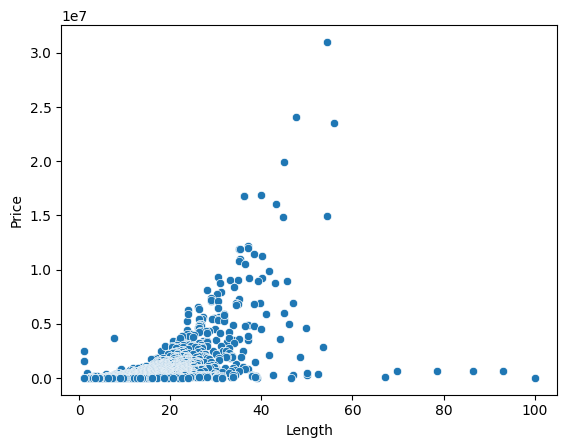

In [462]:
sns.scatterplot(data=new_df,x='Length',y='Price')

<Axes: xlabel='Width', ylabel='Price'>

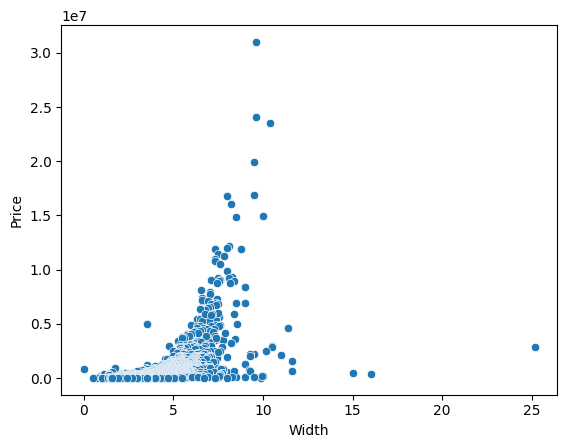

In [463]:
sns.scatterplot(data=new_df,x='Width',y='Price')

<Axes: xlabel='Number of views last 7 days', ylabel='Price'>

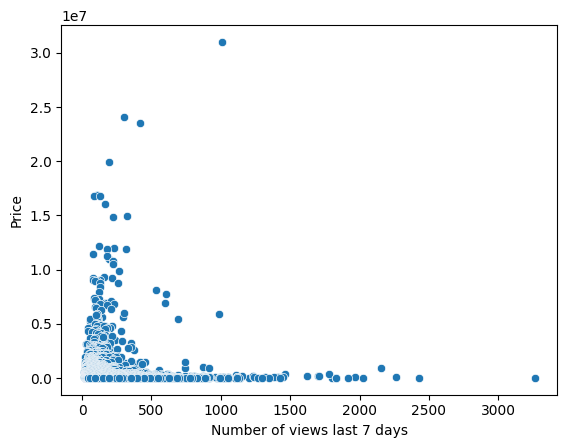

In [464]:
sns.scatterplot(data=new_df,x='Number of views last 7 days',y='Price')

<Axes: xlabel='Year Built', ylabel='Price'>

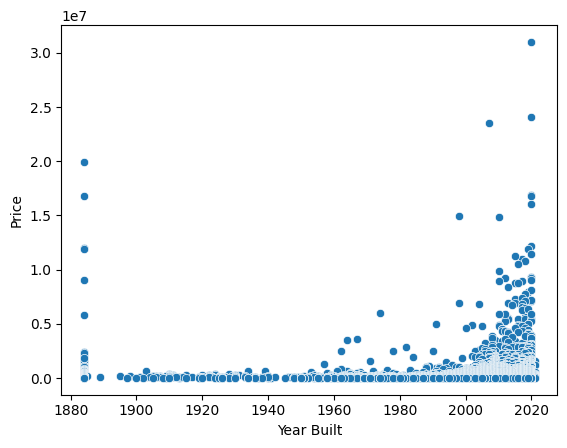

In [465]:
sns.scatterplot(data=new_df,x='Year Built',y='Price')

In [466]:
# splitting the independent and dependent variable:
X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

In [467]:
#Splitting the dataset into train and test:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [468]:
X_train.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
6762,Motor Yacht,Fairline power boats,"Used boat,Diesel",1994,11.71,3.76,other,Italy,220
7621,Bowrider,Bayliner power boats,"new boat from stock,Unleaded",2020,6.84,2.44,other,Germany,70
5148,Motor Yacht,Sunseeker power boats,"Used boat,Diesel",2001,16.13,4.44,GRP,Germany,134
4694,Motor Yacht,others3,"Used boat,Diesel",2012,14.63,4.43,other,others,287
7351,Sport Boat,others2,"Used boat,Diesel",1991,12.70,4.00,PVC,France,81


In [469]:
y_train

6762     85000.0
7621     58500.0
5148    219000.0
4694    290000.0
7351     65000.0
          ...   
350      21740.0
79        7500.0
8039     51570.0
6936     79000.0
5640    159500.0
Name: Price, Length: 7910, dtype: float64

In [470]:
# preprocessing the columns:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,LabelEncoder,PowerTransformer

In [471]:
X_train.select_dtypes(exclude='number').columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Material', 'Location'], dtype='object')

In [472]:
le = LabelEncoder()
cat_cols = ['Boat Type', 'Manufacturer', 'Type', 'Material', 'Location']
for col in cat_cols:
  X_train[col] = le.fit_transform(X_train[col])
  X_test[col] = le.transform(X_test[col])

In [473]:
X_train.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
6762,6,6,3,1994,11.71,3.76,11,4,220
7621,0,2,7,2020,6.84,2.44,11,3,70
5148,6,23,3,2001,16.13,4.44,2,3,134
4694,6,27,3,2012,14.63,4.43,11,10,287
7351,8,26,3,1991,12.70,4.00,4,2,81


In [474]:
X_test.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
2251,6,20,2,2006,14.5,4.26,11,4,69
4802,10,27,3,1910,13.3,3.12,8,8,245
1473,8,27,3,2008,9.4,3.35,2,0,36
940,6,26,4,2005,8.8,2.80,2,7,207
368,1,27,2,1992,8.8,2.98,2,5,146


In [475]:
X_train_trf = X_train.copy()
X_test_trf = X_test.copy()

In [476]:
ps = PowerTransformer()
num_cols = ['Length','Width','Year Built','Number of views last 7 days']
for col in num_cols:
  X_train_trf[col] = ps.fit_transform(X_train_trf[col].values.reshape(-1,1))
  X_test_trf[col] = ps.transform(X_test_trf[col].values.reshape(-1,1))

In [477]:
X_train_trf.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
6762,6,6,3,-0.600796,0.311181,0.387099,11,4,0.977008
7621,0,2,7,1.138911,-0.950830,-0.975155,11,3,-0.663496
5148,6,23,3,-0.228651,0.992182,0.892225,2,3,0.316614
4694,6,27,3,0.490596,0.790462,0.885468,11,10,1.302364
7351,8,26,3,-0.742907,0.488968,0.576698,4,2,-0.431172


In [478]:
X_test_trf.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
2251,6,20,2,0.076055,0.771759,0.767771,11,4,-0.686789
4802,10,27,3,-2.413449,0.588526,-0.194184,8,8,1.111053
1473,8,27,3,0.207998,-0.187421,0.028919,2,0,-1.815389
940,6,26,4,0.012303,-0.341862,-0.536453,2,7,0.899720
368,1,27,2,-0.696619,-0.341862,-0.339020,2,5,0.436071


In [479]:
y_train_trf = ps.fit_transform(y_train.values.reshape(-1,1))
y_test_trf = ps.transform(y_test.values.reshape(-1,1))

# Linear Regression

In [480]:
#Applying Linear Regressor:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_trf,y_train_trf)

LinearRegression()

In [481]:
#predicting the outputs:
y_pred = lr.predict(X_test_trf)

In [482]:
#evaluating the model using the metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [483]:
y_pred_trf = np.log(y_pred)

In [486]:
r2 = r2_score(y_test_trf,y_pred)
mae = mean_absolute_error(y_test_trf,y_pred)
mse = mean_squared_error(y_test_trf,y_pred)
rmse = mean_squared_error(y_test_trf,y_pred,squared=False)

print('R2Score:',r2)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)


R2Score: 0.7990558485316761
MAE: 0.34062366646665004
MSE: 0.20751233031350905
RMSE: 0.455535213033536


<Axes: >

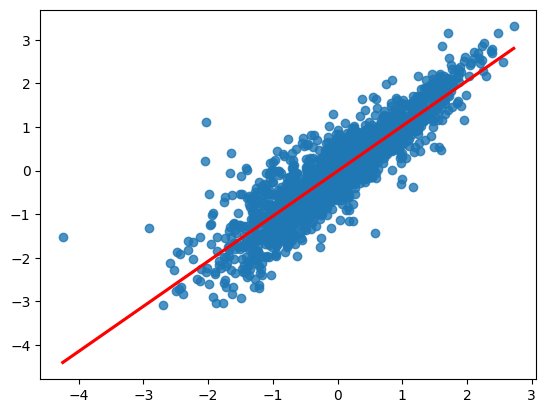

In [487]:
sns.regplot(x=y_pred,y=y_test_trf,ci=None,line_kws={'color':'red'})

# Decision tree

In [488]:
from sklearn.tree import DecisionTreeRegressor

In [489]:
dt = DecisionTreeRegressor()
dt.fit(X_train_trf,y_train_trf)
dt_pred = dt.predict(X_test_trf)

In [490]:
#evaluation:
r2 = r2_score(y_test_trf,dt_pred)
mae = mean_absolute_error(y_test_trf,dt_pred)
mse = mean_squared_error(y_test_trf,dt_pred)
rmse = mean_squared_error(y_test_trf,dt_pred,squared=False)

print('R2Score:',r2)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)

R2Score: 0.8237312940966589
MAE: 0.2932327951167696
MSE: 0.1820303286065776
RMSE: 0.42665012434848487


# Random Forest

In [491]:
from sklearn.ensemble import RandomForestRegressor

In [492]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train_trf,y_train_trf)
rf_pred = rf.predict(X_test_trf)

In [493]:
#evaluation:
r2 = r2_score(y_test_trf,rf_pred)
mae = mean_absolute_error(y_test_trf,rf_pred)
mse = mean_squared_error(y_test_trf,rf_pred)
rmse = mean_squared_error(y_test_trf,rf_pred,squared=False)

print('R2Score:',r2)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)

R2Score: 0.9114298699373997
MAE: 0.20757573092964754
MSE: 0.09146518548143968
RMSE: 0.302432117146046
